In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
def preprocess_data(df):
    df = df.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
    
    df = df.merge(pd.get_dummies(df['Pclass']), left_index = True, right_index = True)
    df = df.merge(pd.get_dummies(df['Sex']), left_index = True, right_index = True)
    
    df.drop(['Pclass', 'Sex', 'male'], axis = 1, inplace = True)
    
    mean_age = df['Age'].mean()
    
    df['Age'].fillna(mean_age, inplace = True)
    
    train = df.values
    scaler = StandardScaler()
    train = scaler.fit_transform(train)
    train = np.insert(train, 0, 1, axis = 1)
    
    return train


Cross-Entropy Loss Function

In [4]:
def cross_entropy(beta, X, y):
    y_pred = X @ beta
    
    N = X.shape[0]
    p = y
    q = sigmoid(y_pred)
    loss = np.sum(((-1*p) * np.log(q)) - ((1 - p) * np.log(1-q)))

    return loss / N

Sigmoid

In [5]:
def sigmoid(x):
    x_exp = np.exp(-x)
    
    return 1 / (1 + x_exp)


Gradients

In [6]:
def grad_L(beta, X, y):
    N = X.shape[0]
    grad = 0
    
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
                
        grad_i = (sigmoid(np.vdot(xiHat, beta)) - yi)*xiHat
        
        grad += grad_i

    return grad/N

Gradient Descent

In [7]:
def grad_descent(X, y):
    alpha = 0.1
    iterations = 500
    N, d_plus_1 = X.shape
    L_vals = np.zeros(iterations)
    beta_t = np.zeros((d_plus_1))
        
    for t in range(iterations):
        L_vals[t] = cross_entropy(beta_t, X, y)        
        beta_t = beta_t - alpha*grad_L(beta_t, X, y)
    
    return beta_t, L_vals

In [22]:
def main():
    df_train = pd.read_csv('/Users/dchant/Desktop/Math373/titanic/train.csv')
    df_test = pd.read_csv('/Users/dchant/Desktop/Math373/titanic/test.csv')

    df_out = df_test.loc[:,['PassengerId']]

    y_train = df_train['Survived']
    df_train = preprocess_data(df_train)

    beta_est, L_vals = grad_descent(df_train, y_train)

    plt.plot(L_vals)
    plt.title("Cost Values - Train")
    
    print("beta_est: ", beta_est)
    
    df_test = preprocess_data(df_test)
    pred = np.round(sigmoid(df_test@beta_est))

    df_out['Survived'] = pd.Series(predictions)
    titanic_test1['Survived'] = titanic_test1['Survived'].astype(int)
    df_out.to_csv('submission.csv', index=False)

beta_est:  [-0.64993688 -0.5083113  -0.35245488 -0.06680967  0.55245475  0.04720266
 -0.51441376  1.31279824]


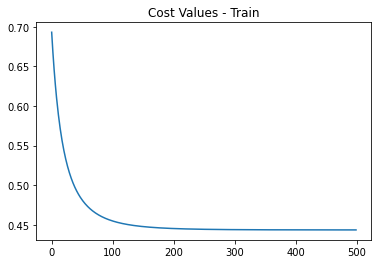

In [23]:
main()

- 